   Width  Height  FileSize
0    256     256      9955
1    256     256     12471
2    256     256      8864
3    256     256     14732
4    256     256     13094
Середньоквадратична похибка (MSE): 9709412.336937506
Середня абсолютна похибка (MAE): 2358.598994755245
Коефіцієнт детермінації (R^2): -2.7930257622266197e-05


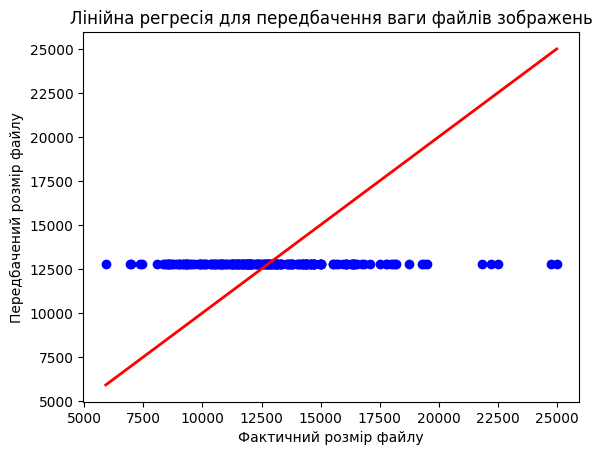

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from PIL import Image

# Функція для отримання розмірів і ваги зображення
def get_image_data(image_folder):
    data = {'Width': [], 'Height': [], 'FileSize': []}
    
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            
            # Отримуємо розміри зображення
            img = Image.open(image_path)
            width, height = img.size
            data['Width'].append(width)
            data['Height'].append(height)
            
            # Отримуємо вагу файлу
            filesize = os.path.getsize(image_path)
            data['FileSize'].append(filesize)
    
    return pd.DataFrame(data)

# Створюємо набір даних для зображень
image_folder = r'D:\Learning\Інтелектуальний аналіз даних\Data_Science\DataSet\archive\train\iris' 
df = get_image_data(image_folder)

# Виводимо перші кілька рядків датасету
print(df.head())

# Розділяємо дані на незалежні змінні (X) та залежну змінну (y)
X = df[['Width', 'Height']]  # Розміри зображень як ознаки
y = df['FileSize']  # Вага зображень як цільова змінна

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель
model.fit(X_train, y_train)

# Робимо передбачення
y_pred = model.predict(X_test)

# Оцінюємо модель за допомогою метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

# Візуалізація результатів
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Фактичний розмір файлу')
plt.ylabel('Передбачений розмір файлу')
plt.title('Лінійна регресія для передбачення ваги файлів зображень')
plt.show()
